In [2]:
import matplotlib.pyplot as plt
import plots
%matplotlib widget

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
import pandas as pd

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.linear_model import LinearRegression

In [4]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def Restore_data(file_name):
    ''' Restore the information .csv file in a python list '''
    data=[]
    with open(file_name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            data.append(float(list(row)[0]))
        #reader = csv.reader(f)
        #restored_list = list(reader)[0]
        #data = [float(i) for i in restored_list]
        return data  

-0.9993863255074005
-0.0035338437248416676


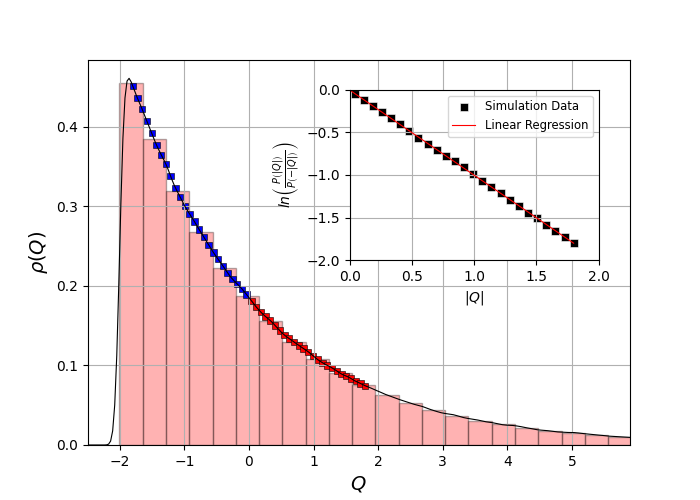

In [5]:
Q = Restore_data('KBT2=E2/TransferHeat.dat')
fig, a = plt.subplots(figsize=(7, 5))

a.hist(Q, bins=75, fc='red', alpha=0.3, color= 'r', edgecolor='black', density=True)
a.set_xlabel(r'$Q$', fontsize=14)
a.set_ylabel(r'$\rho \left( Q \right) $', fontsize=14)

DE_min, DE_max, partitions_reg = -1.8, 1.8, 50
colors = (partitions_reg//2)*['b']+(partitions_reg//2)*['r']
DE_grid_Q_reg = np.linspace(DE_min, DE_max, partitions_reg)
P_reg = kde_sklearn(np.array(Q), DE_grid_Q_reg, bandwidth=0.06)
a.scatter(DE_grid_Q_reg, P_reg, marker = "s", color=colors, edgecolor='black', linewidth=0.4, s=21)

DE_min, DE_max, partitions = -3.0, 6.5, 300
DE_grid_Q = np.linspace(DE_min, DE_max, partitions)
P = kde_sklearn(np.array(Q), DE_grid_Q, bandwidth=0.06)

plt.xlim(-2.5, 5.9)
#plt.ylim( 0.0, 0.55)
a.plot(DE_grid_Q, P, color='black', linewidth=0.8)
a.grid()

lim = int(partitions_reg/2)

P_neg_Q = P_reg[:lim][::-1]
P_pos_Q = P_reg[lim:]

DE_neg_grid_Q = DE_grid_Q_reg[:lim][::-1]
DE_pos_grid_Q = DE_grid_Q_reg[lim:]

log_Ps_Q = np.log(P_pos_Q/P_neg_Q)

model = LinearRegression(fit_intercept=True)
model.fit(DE_pos_grid_Q.reshape(-1, 1), log_Ps_Q)
print(model.coef_[0]) #slope
print(model.intercept_) #intercep
m_Q = model.coef_[0]
b_Q = model.intercept_

slope = model.coef_[0]
intercept = model.intercept_

absQ=np.linspace(0, 1.8, 20)

left, bottom, width, height = [0.5, 0.48, 0.355, 0.34]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.scatter(DE_pos_grid_Q, log_Ps_Q, marker = "s", color="black", label=r"Simulation Data", edgecolor='white', linewidth=0.4)
ax2.plot(absQ, slope*absQ + intercept, color="red", label=r"Linear Regression", linewidth=0.8)

ax2.set_xlabel(r'$ |Q| $', fontsize=10)
ax2.set_ylabel(r'$ ln\left( \frac { P\left( \left| Q \right| \right)  }{ P\left( - \left|Q \right| \right)  }  \right)  $', fontsize=10)
ax2.set_xlim(-0.0, 2.0)
ax2.set_ylim(-2.0, 0.0)
ax2.legend(fontsize='small')

#ax2.set_yticks(ticks=5)
ax2.grid()

#ax2.plot(range(6)[::-1], color='green')

#plt.xlim(-3.0, 6.5)
#plt.legend(fontsize = 'large')
#plt.rc('grid', linestyle="--", color='grey')
#plt.axvline(x=0.0, ls='dotted', color='black') #ls='dotted'

plt.show()

-0.6675227809597266 0.0015270084832095243
-0.9993863255074005 -0.0035338437248416676
-1.9918518688628437 -0.006474500278590867


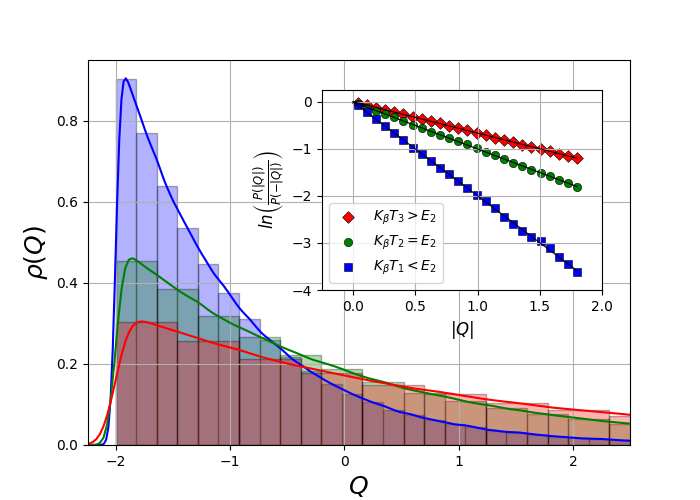

In [6]:
Qge = Restore_data('KBT3>E2/TransferHeat.dat')
Qls = Restore_data('KBT1<E2/TransferHeat.dat')
Qeq = Restore_data('KBT2=E2/TransferHeat.dat')

fig, a = plt.subplots(figsize=(7, 5))
left, bottom, width, height = [0.46, 0.42, 0.40, 0.40]
ax2 = fig.add_axes([left, bottom, width, height])

a.hist(Qls, bins=75, fc='blue', alpha=0.3, color= 'r', edgecolor='black', density=True)
Qls_min, Qls_max, Qls_partitions = -3.0, 6.5, 500
Qls_grid = np.linspace(Qls_min, Qls_max, Qls_partitions)
PQls = kde_sklearn(np.array(Qls), Qls_grid, bandwidth=0.038)
a.plot(Qls_grid, PQls, color='blue', linewidth=1.5)

Qls_min_reg, Qls_max_reg, Qls_reg_partitions = -1.8, 1.8, 50
colors = (Qls_reg_partitions//2)*['b']+(Qls_reg_partitions//2)*['r']
Qls_reg_grid = np.linspace(Qls_min_reg, Qls_max_reg, Qls_reg_partitions)
PQls_reg = kde_sklearn(np.array(Qls), Qls_reg_grid, bandwidth=0.038)
#a.scatter(Qls_reg_grid, PQls_reg, marker = "s", color=colors, edgecolor='black', linewidth=0.4, s=21)

Qls_lim = int(Qls_reg_partitions/2)
PQls_neg = PQls_reg[:Qls_lim][::-1]
PQls_pos = PQls_reg[Qls_lim:]
log_PQls = np.log(PQls_pos/PQls_neg)

Qls_neg_grid = Qls_reg_grid[:Qls_lim][::-1]
Qls_pos_grid = Qls_reg_grid[Qls_lim:]

model_Qls = LinearRegression(fit_intercept=True)
model_Qls.fit(Qls_pos_grid.reshape(-1, 1), log_PQls)

m_Qls = model_Qls.coef_[0] #slope
b_Qls = model_Qls.intercept_   #intercep

#absQls = np.linspace(0, 1.8, 20)
#ax2.scatter(Qls_pos_grid, log_PQls, marker = "s", color="red", label=r'${K}_{\beta}{T} < {E}_{0}$', edgecolor='black', linewidth=0.4)
#ax2.plot(absQls, m_Qls*absQls + b_Qls, color="black", linewidth=0.8)

a.hist(Qeq, bins=75, fc='green', alpha=0.3, color= 'r', edgecolor='black', density=True)
Qeq_min, Qeq_max, Qeq_partitions = -3.0, 6.5, 300
Qeq_grid = np.linspace(Qeq_min, Qeq_max, Qeq_partitions)
PQeq = kde_sklearn(np.array(Qeq), Qeq_grid, bandwidth=0.06)
a.plot(Qeq_grid, PQeq, color='green', linewidth=1.5)

Qeq_min_reg, Qeq_max_reg, Qeq_reg_partitions = -1.8, 1.8, 50
colors = (Qeq_reg_partitions//2)*['b']+(Qeq_reg_partitions//2)*['r']
Qeq_reg_grid = np.linspace(Qeq_min_reg, Qeq_max_reg, Qeq_reg_partitions)
PQeq_reg = kde_sklearn(np.array(Qeq), Qeq_reg_grid, bandwidth=0.06)
#a.scatter(Qeq_reg_grid, PQeq_reg, marker = "s", color=colors, edgecolor='black', linewidth=0.4, s=21)

Qeq_lim = int(Qeq_reg_partitions/2)
PQeq_neg = PQeq_reg[:Qeq_lim][::-1]
PQeq_pos = PQeq_reg[Qeq_lim:]
log_PQeq = np.log(PQeq_pos/PQeq_neg)

Qeq_neg_grid = Qeq_reg_grid[:Qeq_lim][::-1]
Qeq_pos_grid = Qeq_reg_grid[Qeq_lim:]

model_Qeq = LinearRegression(fit_intercept=True)
model_Qeq.fit(Qeq_pos_grid.reshape(-1, 1), log_PQeq)
m_Qeq = model_Qeq.coef_[0]   #slope
b_Qeq = model_Qeq.intercept_ #intercep

#absQeq = np.linspace(0, 1.8, 20)
#ax2.scatter(Qge_pos_grid, log_PQeq, marker = "s", color="blue", label=r'${K}_{\beta}{T} = {E}_{0}$', edgecolor='black', linewidth=0.4)
#ax2.plot(absQeq, m_Qeq*absQeq + b_Qeq, color="black", linewidth=0.8)

a.hist(Qge, bins=75, fc='red', alpha=0.3, color= 'r', edgecolor='black', density=True)
Qge_min, Qge_max, Qge_partitions = -3.0, 6.5, 300
Qge_grid = np.linspace(Qge_min, Qge_max, Qge_partitions)
PQge = kde_sklearn(np.array(Qge), Qge_grid, bandwidth=0.1)
a.plot(Qge_grid, PQge, color='red', linewidth=1.5)

Qge_min_reg, Qge_max_reg, Qge_reg_partitions = -1.8, 1.8, 50
colors = (Qge_reg_partitions//2)*['b']+(Qge_reg_partitions//2)*['r']
Qge_reg_grid = np.linspace(Qge_min_reg, Qge_max_reg, Qge_reg_partitions)
PQge_reg = kde_sklearn(np.array(Qge), Qge_reg_grid, bandwidth=0.1)
#a.scatter(Qge_reg_grid, PQge_reg, marker = "s", color=colors, edgecolor='black', linewidth=0.4, s=21)

Qge_lim = int(Qge_reg_partitions/2)
PQge_neg = PQge_reg[:Qge_lim][::-1]
PQge_pos = PQge_reg[Qge_lim:]
log_PQge = np.log(PQge_pos/PQge_neg)

Qge_neg_grid = Qge_reg_grid[:Qge_lim][::-1]
Qge_pos_grid = Qge_reg_grid[Qge_lim:]

model_Qge = LinearRegression(fit_intercept=True)
model_Qge.fit(Qge_pos_grid.reshape(-1, 1), log_PQge)
m_Qge = model_Qge.coef_[0]   #slope
b_Qge = model_Qge.intercept_ #intercep


absQge = np.linspace(0, 1.8, 20)
ax2.scatter(Qge_pos_grid, log_PQge, marker = "D", color="red", label=r'${K}_{\beta}{T_3} > {E}_{2}$', edgecolor='black', linewidth=0.4)
ax2.plot(absQge, m_Qge*absQge + b_Qge, color="black", linewidth=0.8)

absQeq = np.linspace(0, 1.8, 20)
ax2.scatter(Qge_pos_grid, log_PQeq, marker = "o", color="green", label=r'${K}_{\beta}{T_2} = {E}_{2}$', edgecolor='black', linewidth=0.4)
ax2.plot(absQeq, m_Qeq*absQeq + b_Qeq, color="black", linewidth=0.8)
absQls = np.linspace(0, 1.8, 20)

absQls = np.linspace(0, 1.8, 20)
ax2.scatter(Qls_pos_grid, log_PQls, marker = "s", color="blue", label=r'${K}_{\beta}{T_1} < {E}_{2}$', edgecolor='black', linewidth=0.4)
ax2.plot(absQls, m_Qls*absQls + b_Qls, color="black", linewidth=0.8)

ax2.set_xlabel(r'$ |Q| $', fontsize=12)
ax2.set_ylabel(r'$ ln\left( \frac { P\left( \left| Q \right| \right)  }{ P\left( - \left|Q \right| \right)  }  \right)  $', fontsize=12)
ax2.set_xlim(-0.25, 2.0)
ax2.set_ylim(-4.0, 0.25)
ax2.legend(fontsize='medium')
ax2.grid()

a.set_ylabel(r'$\rho \left( Q \right) $', fontsize=18)
a.set_xlabel(r'$Q$', fontsize=18)
a.set_xlim(-2.25, 2.5)
a.grid()
print(m_Qge, b_Qge)
print(m_Qeq, b_Qeq)
print(m_Qls, b_Qls)

# Numerical error of regression parameters

In [7]:
# TO COMPUTE ERRORS OF INTERCEPS AND SLOPES
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

randn = np.random.randn

X = pd.DataFrame(Qge_pos_grid, columns=['X1']) # Change the variable Q**_pos_grid
y = pd.DataFrame(log_PQge, columns=['Y'])      # Change the variable log_PQ**

model = linear_model.LinearRegression()
model.fit(X=X, y=y)
N = len(X)
p = len(X.columns) + 1  # plus one because LinearRegression adds an intercept term
X_with_intercept = np.empty(shape=(N, p))
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X.values

ols = sm.OLS(y.values, X_with_intercept)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.163e+05
Date:                Mon, 22 May 2023   Prob (F-statistic):           4.20e-44
Time:                        07:22:06   Log-Likelihood:                 97.113
No. Observations:                  25   AIC:                            -190.2
Df Residuals:                      23   BIC:                            -187.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.002      0.736      0.4

-0.9994246384559655 -0.0034378615607248975


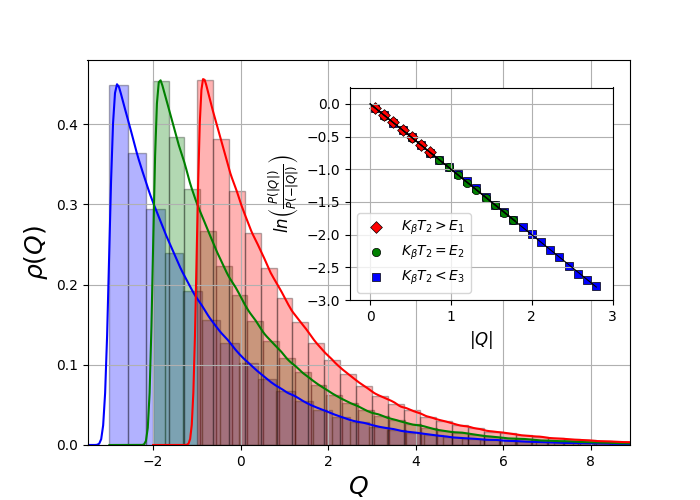

In [8]:
Qge = Restore_data('KBT2>E1/TransferHeat.dat')
Qeq = Restore_data('KBT2=E2/TransferHeat.dat')
Qls = Restore_data('KBT2<E3/TransferHeat.dat')

fig, a = plt.subplots(figsize=(7, 5))
left, bottom, width, height = [0.50, 0.4, 0.375, 0.425]
ax2 = fig.add_axes([left, bottom, width, height])

a.hist(Qls, bins=75, fc='blue', alpha=0.3, color= 'r', edgecolor='black', density=True)
Qls_min, Qls_max, Qls_partitions = -4.0, 9.5, 300
Qls_grid = np.linspace(Qls_min, Qls_max, Qls_partitions)
PQls = kde_sklearn(np.array(Qls), Qls_grid, bandwidth=0.085)
a.plot(Qls_grid, PQls, color='blue', linewidth=1.5)

Qls_min_reg, Qls_max_reg, Qls_reg_partitions = -2.8, 2.8, 50
colors = (Qls_reg_partitions//2)*['b']+(Qls_reg_partitions//2)*['r']
Qls_reg_grid = np.linspace(Qls_min_reg, Qls_max_reg, Qls_reg_partitions)
PQls_reg = kde_sklearn(np.array(Qls), Qls_reg_grid, bandwidth=0.085)
#a.scatter(Qls_reg_grid, PQls_reg, marker = "s", color=colors, edgecolor='black', linewidth=0.4, s=21)

Qls_lim = int(Qls_reg_partitions/2)
PQls_neg = PQls_reg[:Qls_lim][::-1]
PQls_pos = PQls_reg[Qls_lim:]
log_PQls = np.log(PQls_pos/PQls_neg)

Qls_neg_grid = Qls_reg_grid[:Qls_lim][::-1]
Qls_pos_grid = Qls_reg_grid[Qls_lim:]

model_Qls = LinearRegression(fit_intercept=True)
model_Qls.fit(Qls_pos_grid.reshape(-1, 1), log_PQls)

m_Qls = model_Qls.coef_[0] #slope
b_Qls = model_Qls.intercept_   #intercep

a.hist(Qeq, bins=75, fc='green', alpha=0.3, color= 'r', edgecolor='black', density=True)
Qeq_min, Qeq_max, Qeq_partitions = -3.0, 9.5, 300
Qeq_grid = np.linspace(Qeq_min, Qeq_max, Qeq_partitions)
PQeq = kde_sklearn(np.array(Qeq), Qeq_grid, bandwidth=0.07)
a.plot(Qeq_grid, PQeq, color='green', linewidth=1.5)

Qeq_min_reg, Qeq_max_reg = -1.8, 1.8
Qeq_reg_grid = Qls_reg_grid[(Qls_reg_grid > Qeq_min_reg) & (Qls_reg_grid < Qeq_max_reg)]
Qeq_reg_partitions, = Qeq_reg_grid.shape
colors = (Qeq_reg_partitions//2)*['b']+(Qeq_reg_partitions//2)*['r']
PQeq_reg = kde_sklearn(np.array(Qeq), Qeq_reg_grid, bandwidth=0.07)
#a.scatter(Qeq_reg_grid, PQeq_reg, marker = "s", color=colors, edgecolor='black', linewidth=0.4, s=21)

Qeq_lim = int(Qeq_reg_partitions/2)
PQeq_neg = PQeq_reg[:Qeq_lim][::-1]
PQeq_pos = PQeq_reg[Qeq_lim:]
log_PQeq = np.log(PQeq_pos/PQeq_neg)

Qeq_neg_grid = Qeq_reg_grid[:Qeq_lim][::-1]
Qeq_pos_grid = Qeq_reg_grid[Qeq_lim:]

model_Qeq = LinearRegression(fit_intercept=True)
model_Qeq.fit(Qeq_pos_grid.reshape(-1, 1), log_PQeq)
m_Qeq = model_Qeq.coef_[0]   #slope
b_Qeq = model_Qeq.intercept_ #intercep

a.hist(Qge, bins=75, fc='red', alpha=0.3, color= 'r', edgecolor='black', density=True)
Qge_min, Qge_max, Qge_partitions = -2.0, 9.0, 300
Qge_grid = np.linspace(Qge_min, Qge_max, Qge_partitions)
PQge = kde_sklearn(np.array(Qge), Qge_grid, bandwidth=0.07)
a.plot(Qge_grid, PQge, color='red', linewidth=1.5)

Qge_min_reg, Qge_max_reg = -0.8, 0.8
Qge_reg_grid = Qls_reg_grid[(Qls_reg_grid > Qge_min_reg) & (Qls_reg_grid < Qge_max_reg)]
Qge_reg_partitions, = Qge_reg_grid.shape
colors = (Qge_reg_partitions//2)*['b']+(Qge_reg_partitions//2)*['r']
PQge_reg = kde_sklearn(np.array(Qge), Qge_reg_grid, bandwidth=0.07)
#a.scatter(Qge_reg_grid, PQge_reg, marker = "s", color=colors, edgecolor='black', linewidth=0.4, s=21)

Qge_lim = int(Qge_reg_partitions/2)
PQge_neg = PQge_reg[:Qge_lim][::-1]
PQge_pos = PQge_reg[Qge_lim:]
log_PQge = np.log(PQge_pos/PQge_neg)

Qge_neg_grid = Qge_reg_grid[:Qge_lim][::-1]
Qge_pos_grid = Qge_reg_grid[Qge_lim:]

model_Qge = LinearRegression(fit_intercept=True)
model_Qge.fit(Qge_pos_grid.reshape(-1, 1), log_PQge)
m_Qge = model_Qge.coef_[0]   #slope
b_Qge = model_Qge.intercept_ #intercep

absQls = np.linspace(0, 2.8, 20)
ax2.scatter(Qls_pos_grid, log_PQls, marker = "s", color="blue", label=r'${K}_{\beta}{T_2} < {E}_{3}$', edgecolor='black', linewidth=0.5)
ax2.plot(absQls, m_Qls*absQls + b_Qls, color="black", linewidth=0.8)

absQeq = np.linspace(0, 1.8, 20)
ax2.scatter(Qeq_pos_grid, log_PQeq, marker = "o", color="green", label=r'${K}_{\beta}{T_2} = {E}_{2}$', edgecolor='black', linewidth=0.5)
ax2.plot(absQeq, m_Qeq*absQeq + b_Qeq, color="black", linewidth=0.8)

absQge = np.linspace(0, 1.8, 20)
ax2.scatter(Qge_pos_grid, log_PQge, marker = "D", color="red", label=r'${K}_{\beta}{T_2} > {E}_{1}$', edgecolor='black', linewidth=0.5)
ax2.plot(absQge, m_Qge*absQge + b_Qge, color="black", linewidth=0.8)

ax2.set_xlabel(r'$ |Q| $', fontsize=12)
ax2.set_ylabel(r'$ ln\left( \frac { P\left( \left| Q \right| \right)  }{ P\left( - \left|Q \right| \right)  }  \right)  $', fontsize=12)
ax2.set_xlim(-0.25, 3.00)
ax2.set_ylim(-3.00, 0.25)
#ax2.legend(fontsize='medium', loc='lower left')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left')
ax2.grid()

a.set_ylabel(r'$\rho \left( Q \right) $', fontsize=18)
a.set_xlabel(r'$Q$', fontsize=18)
a.set_xlim(-3.5, 8.9)
a.set_ylim( 0.0, 0.48)
a.grid()
print(m_Qeq, b_Qeq)